In [1]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Metody Numeryczne

## Układy równań liniowych – macierze prostokątne i rzadkie



### dr hab. inż. Jerzy Baranowski, Prof.AGH


# Residuum

- Ang. Residual
- Użyteczna wielkość do oceny jakości rozwiązania równania liniowego
$$
r=b-Ax
$$
- Często wykorzystujemy również normę residuum
$$
\Vert r\Vert_2=\sqrt{r^*r}
$$

# Przykład motywacyjny

Dopasowanie wielomianu do 11 punktów róownoodległych


$$
p(x)=c_0+c_1 x+c_2 x^2 +\ldots +c_{m-1} x^{m-1} 
$$

$$
\begin{bmatrix}
1&x_1&x_1^2&&x_1^{m-1}\\
1&x_2&x_2^2&\dots&x_2^{m-1}\\
1&x_3&x_3^2&&x_3^{m-1}\\
&\vdots&&\ddots&\vdots\\
1&x_m&x_m^2&\dots&x_m^{m-1}
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\c_2\\\vdots\\ c_{m-1}
\end{bmatrix}
=
\begin{bmatrix}
y_1\\y_2\\y_3\\\vdots\\ y_{m}
\end{bmatrix}
$$

In [405]:
import numpy as np
import numpy.linalg as nplin
import scipy
import matplotlib.pyplot as plt


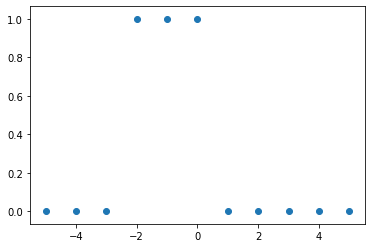

In [408]:
x=[i for i in range(-5,6)]
y=[0,0,0,1,1,1,0,0,0,0,0]
plt.scatter(x,y)
A=np.vander(x,10,)

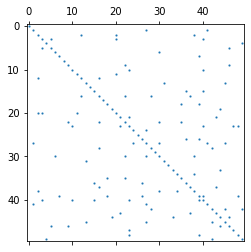

In [357]:
np.random.seed(12345)
matrixSize = 50
A=2*np.random.rand(matrixSize,matrixSize)-1
A=(A+A.T)/2
np.fill_diagonal(A, 1)
A[A < 0.7] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)
plt.spy(spA,markersize=1)

130.8925614896482

In [320]:
import scipy.sparse.linalg as spla


In [321]:
import inspect
A = scipy.sparse.csc_matrix (A)

#M_i=scipy.sparse.linalg.spilu(A)
#M2=scipy.sparse.linalg.LinearOperator((matrixSize,matrixSize),M_i.solve)

nmax_iter = 1
rstart = 1
tol = 1e-12
e = np.zeros((nmax_iter + 1, 1))
rr = 1

class gmres_counter(object):
   def __init__(self, disp=False):
      self._disp = disp
      self.niter = 0
      self.callbacks = []
   def __call__(self, rk=None):
      self.callbacks.append(str(rk))
      self.niter += 1
      if self._disp:
          print('%s' %(str(rk)))
        
class cg_counter(object):
   def __init__(self, disp=False):
      self._disp = disp
      self.niter = 0
      self.callbacks = []
   def __call__(self, rk=None):
      res=inspect.currentframe().f_back.f_locals['resid'] 
      self.callbacks.append(res)
      self.niter += 1
      if self._disp:
          print('%s' %(str(res)))        

def report(xk):
    frame = inspect.currentframe().f_back
    print(frame.f_locals['resid'])

In [349]:
        
counter = gmres_counter()
x, info = scipy.sparse.linalg.gmres(A, b, x0=x1, tol=tol, 
                                    callback=counter)
print(str(counter.niter))
px.scatter(x=[i for i in range(0,counter.niter)],y=counter.callbacks,log_y=True)

500


In [323]:
counter.callbacks

['0.3411881547291509',
 '0.32707537836400125',
 '0.1719564104583624',
 '0.12589654458982152',
 '0.12344777099149115',
 '0.10978340158687105',
 '0.10439023317978036',
 '0.1031849713310492',
 '0.09400295014218923',
 '0.09359527471126262',
 '0.08987146180229322',
 '0.07824149749930674',
 '0.07362248652702831',
 '0.0712761999787359',
 '0.06230380574272964',
 '0.06225035290944941',
 '0.058642798903563456',
 '0.055322067373714374',
 '0.05531841782789943',
 '0.05169249450004007',
 '0.04968232845550413',
 '0.04967304074539307',
 '0.047856455908964736',
 '0.047341678430287665',
 '0.047033950054828993',
 '0.04408005785833989',
 '0.04320919380647072',
 '0.04297216379367134',
 '0.04073446390166683',
 '0.03901476686685885',
 '0.038921013234780075',
 '0.03801666828723672',
 '0.036982139245398976',
 '0.03694029306650381',
 '0.035293172865466356',
 '0.03461221737406953',
 '0.03373076869325756',
 '0.03141650017137823',
 '0.03112236279703855',
 '0.03063048153559577',
 '0.03025157073646916',
 '0.03017544

In [330]:
cnt=cg_counter()
x, info = scipy.sparse.linalg.cg(A, b, x0=x1, tol=tol,  
                                    callback=cnt)
print(str(cnt.niter))
px.scatter(x=[i for i in range(0,cnt.niter)],y=cnt.callbacks,log_y=True)

49


In [317]:
cnt.callbacks


[1.8771307943212814,
 30.54875464448815,
 1.0417966827123277,
 0.666698689402731,
 1.688866107091341,
 0.8969330035351757,
 0.443648145822958,
 3.4736853645386736,
 0.44948958666154987,
 0.48109283910062417,
 0.4390978295761517,
 2.3414798226275844,
 0.4865187627424978,
 0.26249080118391505,
 0.3432329421695934,
 0.39336350717248864,
 0.11884455118790042,
 0.07789957315582882,
 0.3464442644154846,
 0.05087052831483144,
 0.015460689420952831,
 0.006357382746508213,
 0.003028993848698672,
 0.001365572378094548,
 0.000579297926608733,
 0.00024313685226580057,
 5.270826345429091e-05,
 5.899118385512337e-05,
 7.698479090749423e-06,
 6.359113249405409e-07,
 9.237948098674296e-09,
 7.053257283526364e-10,
 3.544409515805293e-11,
 8.576622258987618e-13]

1502


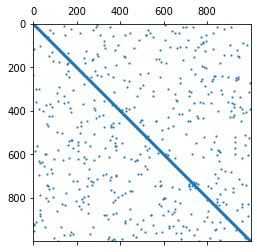

In [368]:
np.random.seed(12345)
matrixSize = 1000
A=2*np.random.rand(matrixSize,matrixSize)-1
#A=0.5*(A+A.T)
A=A
np.fill_diagonal(A, 1)
A[A < 0.999] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)
print(spA.nnz)
# u,s,vt=scipy.sparse.linalg.svds(spA)
# max(s)/min(s)
M_i=scipy.sparse.linalg.spilu(spA)
plt.spy(spA,markersize=1)

In [382]:
import time

T_lu=[]
T_gmres_sparse=[]

M_i=scipy.sparse.linalg.spilu(spA)
M2=scipy.sparse.linalg.LinearOperator((matrixSize,matrixSize),M_i.solve)
x, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol)


In [283]:
for k in range(1,100+1):

    t = time.time()
    x=nplin.solve(A, b)
    elapsed = time.time() - t

    T_lu.append(elapsed)
# for k in range(1,100+1):
#     t = time.time()
#     x, info = scipy.sparse.linalg.gmres(A, b, x0=x1, tol=tol,M=M2)
#     elapsed = time.time() - t
#     T_gmres.append(elapsed)
for k in range(1,100+1):
    t = time.time()
    #M_i=scipy.sparse.linalg.spilu(spA)
    #M2=scipy.sparse.linalg.LinearOperator((matrixSize,matrixSize),M_i.solve)
    x, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol)
    elapsed = time.time() - t
    T_gmres_sparse.append(elapsed)

In [284]:
import pandas as pd
import plotly.express as px
ans_df=pd.DataFrame({'T_LU':np.log(T_lu), 
                     #'T_GMRES' : np.log(T_gmres), 
                     'T_GMRES_sparse':np.log(T_gmres_sparse)} )
ans_df['id']=ans_df.index
tidy_ans_df=pd.wide_to_long(ans_df,stubnames='T',i='id',j='method', sep='_', suffix='\w+').reset_index().drop(columns='id')
#tidy_ans_df['method']=tidy_ans_df['method'].astype('category')
px.histogram(tidy_ans_df, x='T', color='method')

1722


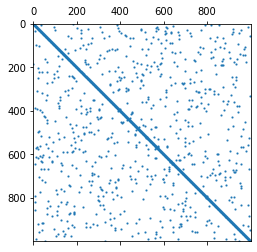

In [388]:

np.random.seed(12345)
matrixSize = 1000
A=2*np.random.rand(matrixSize,matrixSize)-1
A=0.5*(A+A.T)
np.fill_diagonal(A, 1)
A[A < 0.96] = 0

b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)
print(spA.nnz)
plt.spy(spA,markersize=1)

In [397]:
T_cg=[]
T_gmres_sparse=[]

for k in range(1,100+1):
    t = time.time()
    x, info = scipy.sparse.linalg.cg(spA, b, x0=x1, tol=tol)
    elapsed = time.time() - t
    T_cg.append(elapsed)

for k in range(1,100+1):
    t = time.time()
    x, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol)
    elapsed = time.time() - t
    T_gmres_sparse.append(elapsed)    

In [399]:
ans_df=pd.DataFrame({'T_CG':np.log(T_cg), 
                     #'T_GMRES' : np.log(T_gmres), 
                     'T_GMRES_sparse':np.log(T_gmres_sparse)
                    } )
ans_df['id']=ans_df.index
tidy_ans_df=pd.wide_to_long(ans_df,stubnames='T',i='id',j='method', sep='_', suffix='\w+').reset_index().drop(columns='id')
#tidy_ans_df['method']=tidy_ans_df['method'].astype('category')
px.histogram(tidy_ans_df, x='T', color='method')

In [403]:
w,v=scipy.sparse.linalg.eigs(spA,k=50)

In [404]:
w

array([3.32598658+0.j, 3.27405272+0.j, 3.23708523+0.j, 3.23027567+0.j,
       3.14559913+0.j, 3.07628073+0.j, 3.07347109+0.j, 2.98685486+0.j,
       2.94929046+0.j, 2.94945111+0.j, 2.90665839+0.j, 2.88900846+0.j,
       2.88293871+0.j, 2.80939166+0.j, 2.80238858+0.j, 2.80076939+0.j,
       2.79851941+0.j, 2.79578487+0.j, 2.78906719+0.j, 2.75898131+0.j,
       2.73896888+0.j, 2.70543986+0.j, 2.69025581+0.j, 2.68988833+0.j,
       2.6816284 +0.j, 2.67983566+0.j, 2.67812184+0.j, 2.67627207+0.j,
       2.66580573+0.j, 2.65224317+0.j, 2.63981074+0.j, 2.61566887+0.j,
       2.60131456+0.j, 2.48674989+0.j, 2.46003479+0.j, 2.46932244+0.j,
       2.5862629 +0.j, 2.58056817+0.j, 2.55808194+0.j, 2.57414284+0.j,
       2.57211585+0.j, 2.57027906+0.j, 2.56854438+0.j, 2.56528075+0.j,
       2.56645374+0.j, 2.56689854+0.j, 2.56676602+0.j, 2.39495227+0.j,
       2.39174527+0.j, 2.39121129+0.j])